# Reto F1009

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

In [204]:
#------------------------FUNCTIONS----------------------------------------
def create_scree_plot(data):
    
    #Eigenvalue decomposition---------------------------------------------------
    data = data - np.mean(data, axis = 0)
    
    cov_data = np.cov(np.transpose(data))
    
    V, U = np.linalg.eig(cov_data)
    
    eigen_value_sort_descending = np.flip(np.argsort(V))
    U = U[:, eigen_value_sort_descending]
    V = V[eigen_value_sort_descending]
    
    #print("The variances along PCs in values", V)
    #---------------------------------------------------------------------------
    sumvar = sum(V)
    
    eigenvalues_percentages = list()
    for i in range(len(V)):
        eigenvalues_percentages.append(V[i]/sumvar)
    
    
    
    PC_values = np.arange(V.size) + 1
   
    figure, = plt.plot(PC_values, eigenvalues_percentages, '-o', linewidth = 2)
    plt.xlabel('Componentes Principales')
    plt.ylabel('Porcentaje de Varianza')
    plt.ylim(0, 1)
    
    #Retrieving the PCs whose eigenvalues add up to 90% of the data. Our recommended dimensionality reduction
    v = 0.0
   
    for j in range(len(eigenvalues_percentages)):
        v = v + eigenvalues_percentages[j]
        if(v >= 0.9):
            rec_var = j+1
            plt.title(str(rec_var+1) + " componentes representan " + str(np.round((v*100), 2)) + "% de la varianza")
            plt.show()
            return eigenvalues_percentages
            break
        else:
            continue
            
    
#-------------------------------------------------------------------------


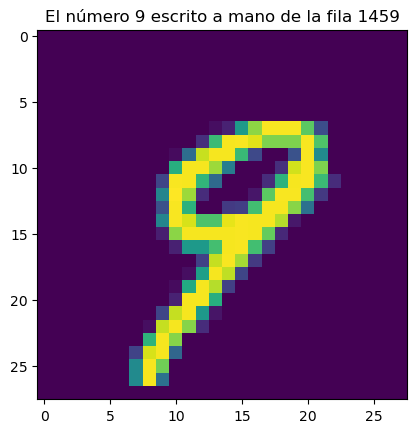

In [174]:


#---------------------PCA on Preprocessed Data Set-----------------------------------
data_ = pd.read_csv("C:/Users/lps-r/F1009/Reto Final/mnist_train.csv", header = None) 
datapoints = data_.to_numpy()

#column is features, rows are datapoints
datapoints.shape

#Visualizing digits with current dataset
digit_to_print = 1459; #a random number from row 0-59999

#Getting the label
digit_label = datapoints[digit_to_print, 0]

#Reshape from 1-D vector to image of 28*28 pixels
digit = np.reshape(datapoints[digit_to_print, 1:785], (28,28))

#Showing image
plt.imshow((digit))
plt.title('El número '+ str(digit_label) +' escrito a mano de la fila '+ str(digit_to_print))
plt.show()


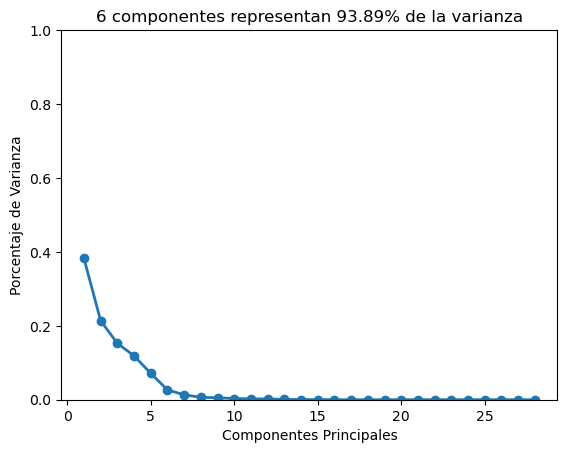

In [205]:
#------------------------Evaluate Dimensions with Scree Plot----------------------------------
data_matrix_MNIST = datapoints[:, 1:785]

digit = np.reshape(data_matrix_MNIST[digit_to_print, :],(28,28))

eigenvalue_percentages = create_scree_plot(digit)

We're looking to keep 90% of the variance of the data while compressing the image as much as possible. We noticed that the eigenvalues of the first 5 principal components add up to 0.9. This means that our images can be reduced down to only 5 Principal Components.

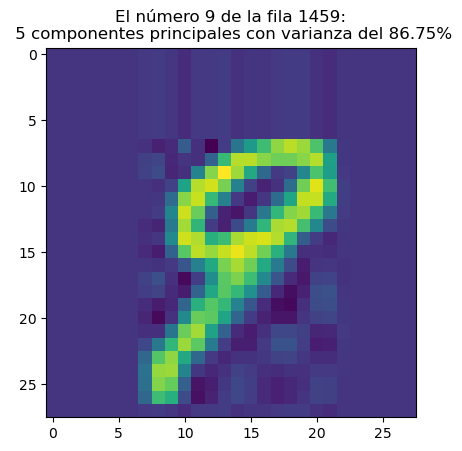

In [212]:
#-------------------Applying PCA with k dimensionality reduction------------------
k = 5 #Since we are keeping 5 principal components 

pca = PCA(k)
pca_digit = pca.fit_transform(digit)

transformed_digit = pca.inverse_transform(pca_digit)

variance_ = 0
for m in range(k-1):
    variance_ = variance_ + eigenvalue_percentages[m]  
    
plt.imshow(transformed_digit)
plt.title("El número 9 de la fila 1459:\n " + str(k) + " componentes principales con varianza del " + str(np.round((variance_ * 100), 2)) + "%")
plt.show()